In [473]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import time



pgw = pd.read_excel("PGW_TD18825_report_20181030064050.xls", "bulkstats_sess-curAve_952441",header=3)
pgw.columns = pgw.columns.str.replace('-','')
pgw.columns = pgw.columns.str.replace(' ', '')
pgw.columns = pgw.columns.str.replace('DateTime','Time')
stgopgw = pgw.STGO55001


pgw = pgw[pd.notnull(pgw)]
pgw.head()

,Time,MRZGGSN3,STGOGGSN4,STGO55001,MRZ55001
0,2018-07-01 00:00:00,1538,8,537264,609143
1,2018-07-01 00:15:00,1523,8,524763,574522
2,2018-07-01 00:30:00,1488,8,526934,577416
3,2018-07-01 00:45:00,1465,8,523286,574586
4,2018-07-01 01:00:00,1514,8,520089,571260


In [474]:
#Usando el rango de fecha como indice de la data.
pgw.index = pd.to_datetime(pgw.pop('Time'))
pgw.head()

,MRZGGSN3,STGOGGSN4,STGO55001,MRZ55001
Time,,,,
2018-07-01 00:00:00,1538,8,537264,609143
2018-07-01 00:15:00,1523,8,524763,574522
2018-07-01 00:30:00,1488,8,526934,577416
2018-07-01 00:45:00,1465,8,523286,574586
2018-07-01 01:00:00,1514,8,520089,571260


In [475]:

pgw.info()




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8833 entries, 2018-07-01 00:00:00 to 2018-10-01 00:00:00
Data columns (total 4 columns):
MRZGGSN3     8833 non-null int64
STGOGGSN4    8833 non-null int64
STGO55001    8833 non-null object
MRZ55001     8833 non-null object
dtypes: int64(2), object(2)
memory usage: 345.0+ KB


In [476]:

#pgw = pgw[pd.notnull(pgw)]
type(pgw.MRZGGSN3)
    
pgw['STGO55001']=pd.to_numeric(pgw.STGO55001, errors='coerce').fillna(0).astype(int)
pgw['MRZ55001']=pd.to_numeric(pgw.MRZ55001, errors='coerce').fillna(0).astype(int)


pgw['Total']= pgw['MRZGGSN3']+pgw['STGOGGSN4']+pgw['STGO55001']+pgw['MRZ55001']
pgw["Rolling_Mean"] = pgw['Total'].rolling(window =80).mean() 
pgw.head()

,MRZGGSN3,STGOGGSN4,STGO55001,MRZ55001,Total,Rolling_Mean
Time,,,,,,
2018-07-01 00:00:00,1538,8,537264,609143,1147953,NaN
2018-07-01 00:15:00,1523,8,524763,574522,1100816,NaN
2018-07-01 00:30:00,1488,8,526934,577416,1105846,NaN
2018-07-01 00:45:00,1465,8,523286,574586,1099345,NaN
2018-07-01 01:00:00,1514,8,520089,571260,1092871,NaN


In [480]:
pgw.index.max()- pgw.index.min()

Timedelta('92 days 00:00:00')

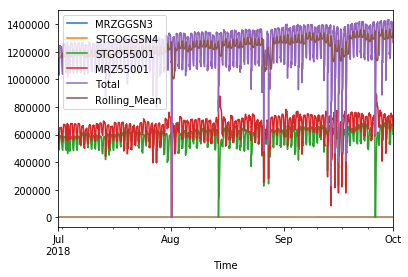

In [478]:

#pgw['Total'].plot()
#pgw['Rolling_Mean'].plot()
pgw.plot()



In [472]:
pgw['Total'].describe()



count    8.833000e+03
mean     1.236894e+06
std      1.350991e+05
min      1.457000e+03
25%      1.136925e+06
50%      1.267715e+06
75%      1.336876e+06
max      1.432793e+06
Name: Total, dtype: float64

In [446]:
pgw["Total"].fillna(120000)
pgw["Total"].isnull().values.any()


False

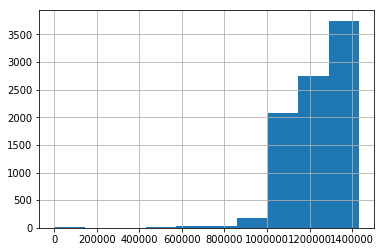

In [447]:
pgw["Total"].hist()

In [448]:
import numpy as np
#from scipy import stats
#from datetime import datetime
#from sklearn import preprocessing
#from sklearn.model_selection import KFold
#from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#std_dev = 3
pgwT = pgw["Total"]
#pgwT = pgwT[(np.abs(stats.zscore(pgwT)) < float(std_dev)).all(axis=1)]
pgwT.count()

8833

In [449]:
x = [i for i in range(pgwT.count())]
y = [i for i in pgw["Total"]]


In [450]:
slope, intercept = np.polyfit(x,y,1)
print(slope)
print(intercept.round(0))

14.318696259022516
1173663.0


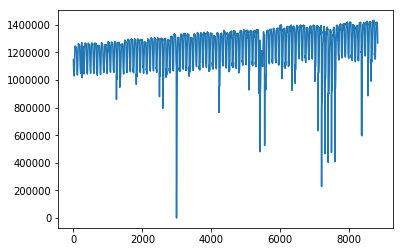

In [451]:
plt.plot(x,y)
plt.show()

In [452]:
future = int(pgwT.count() * 1.50)
x_reg = [i for i in range(future)]
y_reg = [i*slope+intercept*1.1 for i in range(future) ]


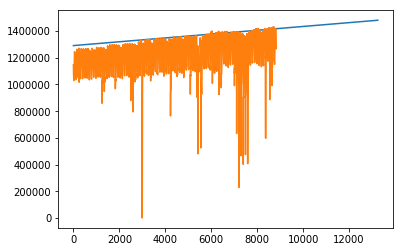

In [453]:
plt.plot(x_reg,y_reg)
plt.plot(x,y)
plt.show()

In [454]:
#Toma El Valor Maximo del dia
pgwD = pgw.loc[pgw.groupby(pd.Grouper(freq='D')).idxmax().iloc[:, 0]]
#pgw.groupby(pd.Grouper(freq='D')).idxmax().iloc[:, 0]
pgwD.head()


,MRZGGSN3,STGOGGSN4,STGO55001,MRZ55001,Total,Rolling_Mean
Time,,,,,,
2018-07-01 10:15:00,1809,10,578476,635161,1215456,NaN
2018-07-02 10:00:00,1780,8,577863,653487,1233138,1.157856e+06
2018-07-03 09:45:00,1785,8,577195,659131,1238119,1.172306e+06
2018-07-04 10:30:00,1763,10,580294,671901,1253968,1.163266e+06
2018-07-05 09:30:00,1842,10,575109,656437,1233398,1.172405e+06


1230.77353704754
1223456.0


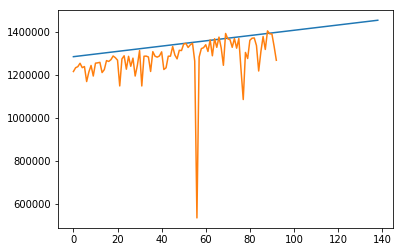

In [455]:
#pgwD['Total'].plot()

x = [i for i in range(pgwD['Total'].count())]
y = [i for i in pgwD["Total"]]
slope, intercept = np.polyfit(x,y,1)
future = int(pgwD['Total'].count() * 1.50)
x_reg = [i for i in range(future)]
y_reg = [i*slope+intercept*1.05 for i in range(future) ]
print(slope)
print(intercept.round(0))
plt.plot(x_reg,y_reg)
plt.plot(x,y)

#plt.show()

In [456]:
import os
import glob
import csv
#import openpyxl

path = '/Users/joseagon/Desktop/Audit/Guatemala/SPGW-01-CEN-GT/marzo'
SPGWGDVGT = '/Users/joseagon/Desktop/Audit/Guatemala/SPGW-GDV-GT/marzo'


#file = '/Users/joseagon/Desktop/Audit/Guatemala/SPGW-GDV-GT/marzo/SPGW-01-GDV-GT_bulkstats_20190301_000000_CST_15_15.csv.gz'

def read_files_from_dir(path,ext=".gz"):
    report = pd.DataFrame(columns=('Date', 'Time', 'Session'))
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(ext):
                target = os.path.join(root, file)
                report = report.append((pd.read_csv(target, skiprows=1, na_values=str, nrows=1, na_filter=False , compression='gzip', error_bad_lines=False,header=None, usecols = [4,11], names=['Date', 'Session'])),sort=False, ignore_index=True)
                report.loc[report.index[-1], 'Time'] = file.split('_')[3]
    return report


report = read_files_from_dir(path) 
report2 = read_files_from_dir(SPGWGDVGT)

report_copy = report
report_copy2 = report2

def init():
    report = report_copy 
    report2 = report_copy2



In [457]:
report.describe()

,Date,Time,Session
count,2976,2976,2976
unique,31,192,2884
top,20190331,224500,202907
freq,96,30,3


In [423]:
def create_report(report,column='Session'):
    report[column]=pd.to_numeric(report.Session).astype(int)
    report['Date'] = report['Date'].astype(str)+report['Time'].astype(str)
    report['Date'] = pd.to_datetime(report['Date'])
    report = report.sort_values('Date')
    report.index = pd.to_datetime(report.pop('Date'))
    report.pop('Time')
    return(report)

#report4['Session']= report['Session'].astype(int) + report2['Session'].astype(int)
report = create_report(report)
report2 = create_report(report2)


#report4 = report 
#report4['Session']= report['Session'].astype(int) + report2['Session'].astype(int)

In [425]:
# Consolidando totales de ambos equipos
report4['Session']= report['Session'].astype(int) + report2['Session'].astype(int)

,Session
Date,
2019-03-01 00:00:01,NaN
2019-03-01 00:15:00,349637.0
2019-03-01 00:30:01,NaN
2019-03-01 00:45:00,340171.0
2019-03-01 01:00:00,336688.0


199911.77852822578
273009.2522177419
471761.48870967724


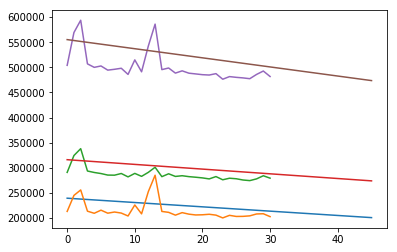

In [432]:
def day_max(report):
    reportD = report.loc[report.groupby(pd.Grouper(freq='D')).idxmax().iloc[:, 0]]
    return reportD

reportD = day_max(report)
report2D = day_max(report2)
report4D = day_max(report4)

def get_x_y(reportD):
    x = [i for i in range(reportD.Session.count())]
    y = [i for i in reportD["Session"]]
    return x,y


def tendencia(x,y,reportD):
    slope, intercept = np.polyfit(x,y,1)
    future = int(reportD["Session"].count() * 1.50)
    x_reg = [i for i in range(future)]
    y_reg = [i*slope+intercept*1.05 for i in range(future) ]
    print (future*slope+intercept*1.05)
    return x_reg , y_reg

x , y = get_x_y(reportD)
x_reg,y_reg = tendencia(x,y,reportD)
x2 ,y2 = get_x_y(report2D)
x2_reg,y2_reg = tendencia(x2,y2,report2D)

xT ,yT = get_x_y(report4D)
xT_reg,yT_reg = tendencia(xT,yT,report4D)




#print(slope)
#print(intercept.round(0))
plt.plot(x_reg,y_reg)
plt.plot(x,y)
plt.plot(x2,y2)
plt.plot(x2_reg,y2_reg)
plt.plot(xT,yT)
plt.plot(xT_reg,yT_reg)





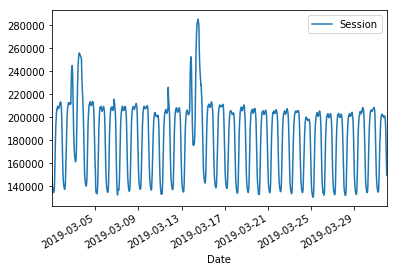

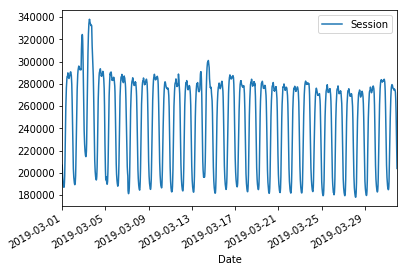

In [438]:
report.plot()
report2.plot()

ModuleNotFoundError: No module named 'matplotlib.finance'